In [ ]:
# Tast 1
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y

import numpy as np
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals

    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


In [ ]:
# Task 2
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ∈ {0,1} and predicted value ŷ ∈ (0,1).
    """
    import numpy as np

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')


def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Extreme wrong prediction (y_true=1, y_pred=0)
    # Clipping prevents log(0), so we just check the value is large
    loss = log_loss(1, 0)
    assert loss > 10, "Test failed for extreme wrong prediction (1,0)"

    # Test case 4: Extreme wrong prediction (y_true=0, y_pred=1)
    loss = log_loss(0, 1)
    assert loss > 10, "Test failed for extreme wrong prediction (0,1)"

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")


# Run the test case
test_log_loss()


log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628
All tests passed!


In [ ]:
# task 3
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    """
    import numpy as np

    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    n = len(y_true)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.sum(loss_vec) / n
    return cost


import numpy as np

def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Manually compute expected cost
    expected_cost = (
        -(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
        -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
        -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)
    ) / 3

    result = cost_function(y_true, y_pred)

    assert np.isclose(result, expected_cost, atol=1e-6), \
        f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")


# Run the test case
test_cost_function()


Test passed for simple case!


In [ ]:
# Task 4
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
        X (ndarray, shape (m,n)): feature matrix
        y (array_like, shape (m,)): true labels {0,1}
        w (array_like, shape (n,)): model weights
        b (float): bias term
    Returns:
        cost (float): logistic regression cost
    """
    import numpy as np

    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute z = Xw + b
    z = np.dot(X, w) + b

    # Sigmoid prediction
    y_pred = 1 / (1 + np.exp(-z))

    # Use Task-3 cost function
    cost = cost_function(y, y_pred)

    return cost


# ---------- Testing the Function ----------
import numpy as np

# Feature matrix (2 samples, 2 features)
X = np.array([[10, 20],
              [-10, 10]])

# True labels
y = np.array([1, 0])

# Weights
w = np.array([0.5, 1.5])

# Bias term
b = 1

print(f"cost for logistic regression(X={X}, y={y}, w={w}, b={b}) = {costfunction_logreg(X, y, w, b)}")


cost for logistic regression(X=[[ 10  20]
 [-10  10]], y=[1 0], w=[0.5 1.5], b=1) = 5.500008350834906


In [ ]:
# Task 5
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
        X (ndarray, shape (n,d)): Input data, n observations with d features
        y (array_like, shape (n,)): True labels (0 or 1)
        w (array_like, shape (d,)): Weight parameters of the model
        b (float): Bias parameter of the model
    Returns:
        grad_w (array_like, shape (d,)): Gradients w.r.t weights
        grad_b (float): Gradient w.r.t bias
    """
    import numpy as np

    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))

    # Gradient w.r.t weights
    grad_w = np.dot(X.T, (y_pred - y)) / n

    # Gradient w.r.t bias
    grad_b = np.sum(y_pred - y) / n

    return grad_w, grad_b


#Simple test case
import numpy as np

X = np.array([[10, 20],
              [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

# Compute gradients
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693
All tests passed!


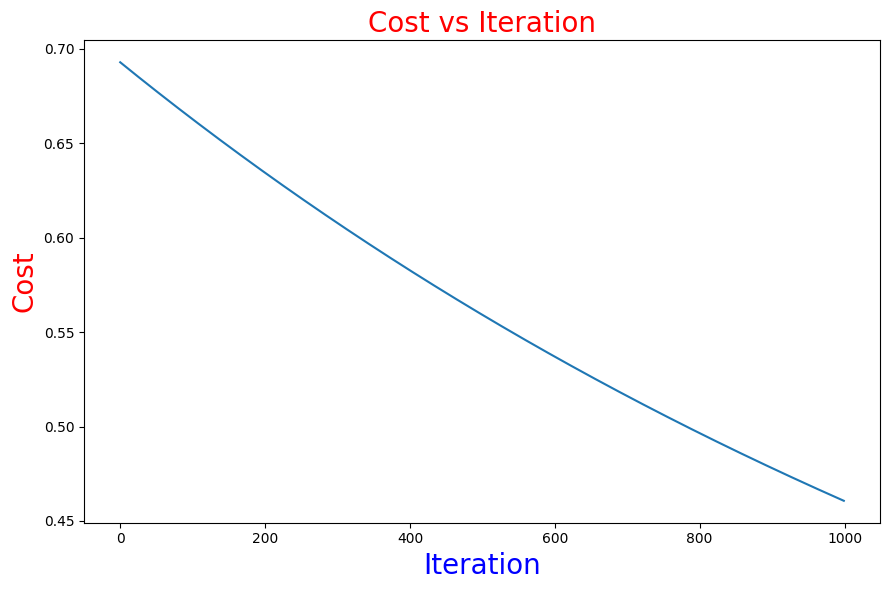

In [ ]:
# Task 6
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# ---------- Test the gradient_descent function ----------
X = np.array([[0.1, 0.2],
              [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


# ---------- Simple assertion test ----------
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed!")

# Run the test
test_gradient_descent()


# ---------- Plotting cost over iteration ----------
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=20, color = "blue")
plt.ylabel("Cost", fontsize=20, color = "red")
plt.title("Cost vs Iteration", fontsize=20, color = "red")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Task 7
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    """
    # Compute linear combination
    z = np.dot(X, w) + b

    # Compute predicted probabilities using sigmoid
    y_test_prob = 1 / (1 + np.exp(-z))

    # Classify based on threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


# ---------- Test function ----------
def test_prediction():
    X_test = np.array([[0.5, 1.0],
                       [1.5, -0.5],
                       [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    # Compute prediction
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Updated expected output based on sigmoid and threshold
    expected_output = np.array([0, 1, 1])

    # Assertion
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

# Run the test
test_prediction()


Test passed!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB

Training Logistic Regression Model:
Iteration 0: Cost 0.6766
Iteration 100: Cost 0.4654
Iteration 200: Cost 0.4559
Iteration 300: Cost 0.4539
Iteration 400: Cost 0.4533
Iteration 500: Cost 0.4531
Iteration 600: Cost 0.4531
Iteration 700: C

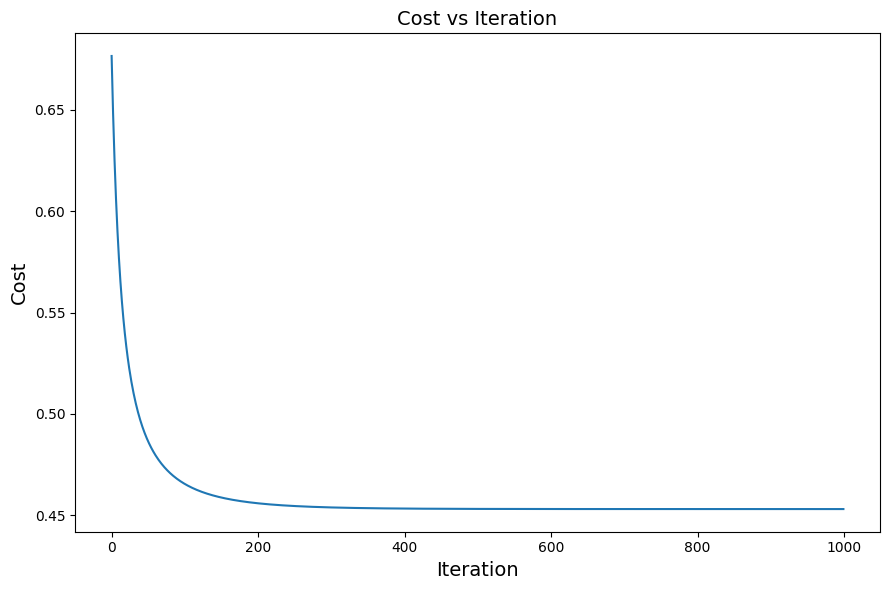


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146

Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


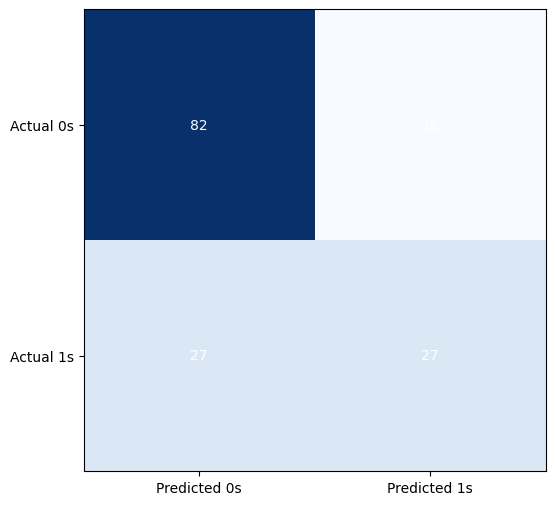

In [ ]:
# Task 8
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    """
    # Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }
    return metrics["confusion_matrix"], metrics["precision"], metrics["recall"], metrics["f1_score"]


# ---------- Data loading and preprocessing ----------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']

data_pima_diabetes = pd.read_csv(url, names=columns)

# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)

data_pima_diabetes.info()
data_pima_diabetes.describe()

# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(X_train_scaled, y_train, w, b,
                                                      alpha, n_iter, show_cost=True,
                                                      show_params=False)

# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")

# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Optional - Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()
